In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SUNIL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### TASK : Exploratory Data Analysis (EDA)
Load Prepared Data:
Load the cleaned and integrated data from Component 1 into Python.


Visualize Data:
Use libraries such as Matplotlib and Seaborn to create visualizations that reveal booking trends, seasonal patterns, and high-demand classes.


Statistical Analysis:
Perform descriptive statistics to summarize data features (e.g., mean, median, standard deviation).
Identify outliers and anomalies using statistical tests or visual methods like box plots.

##### Load Prepared Data:
Load the cleaned and integrated data from Component 1 into Python.

In [3]:
df = pd.read_csv('Merged_Data_Avinash.xlsx', index_col='Unnamed: 0')

In [4]:
df.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime,BookingStartTime,MaxBookees,Number Booked,Price (INR)
0,HXP,20-20-20 2.45pm-3.45pm,2018-04-08,14:45:00,-0.483602,-0.593867,-1.692847
1,HXP,20-20-20 2.45pm-3.45pm,2018-04-15,14:45:00,-0.483602,-0.282487,-1.692847
2,HXP,20-20-20 2.45pm-3.45pm,2018-04-22,14:45:00,-0.483602,-0.386280,-1.692847
3,HXP,20-20-20 2.45pm-3.45pm,2018-04-29,14:45:00,-0.483602,-0.905246,-1.692847
4,HXP,20-20-20 2.45pm-3.45pm,2018-05-06,14:45:00,-0.483602,-1.112833,-1.692847


In [5]:
# drop unnecessary columns
df.drop(['ActivityDescription', 'MaxBookees', 'BookingStartTime'], axis=1, inplace=True)

In [6]:
# encoding ActivitySiteID

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['ActivitySiteID'] = le.fit_transform(df['ActivitySiteID'])

In [7]:
df['BookingEndDateTime'] = pd.to_datetime(df['BookingEndDateTime'])

In [8]:
df.head()

,ActivitySiteID,BookingEndDateTime,Number Booked,Price (INR)
0,1,2018-04-08,-0.593867,-1.692847
1,1,2018-04-15,-0.282487,-1.692847
2,1,2018-04-22,-0.386280,-1.692847
3,1,2018-04-29,-0.905246,-1.692847
4,1,2018-05-06,-1.112833,-1.692847


#### Visualize Data:
Use libraries such as Matplotlib and Seaborn to create visualizations that reveal booking trends, seasonal patterns, and high-demand classes.

c:\Users\SUNIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SUNIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


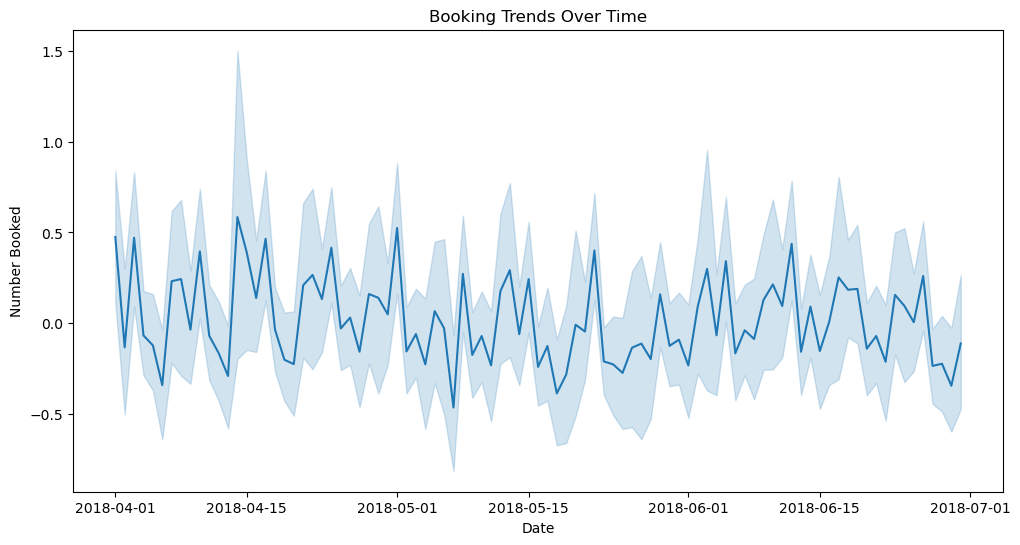

In [9]:
# Plotting the number of bookings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='BookingEndDateTime', y='Number Booked')
plt.title('Booking Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number Booked')
plt.show()


#### Statistical Analysis:
Perform descriptive statistics to summarize data features (e.g., mean, median, standard deviation).
Identify outliers and anomalies using statistical tests or visual methods like box plots.

In [10]:
df.describe()

,ActivitySiteID,BookingEndDateTime,Number Booked,Price (INR)
count,3271.000000,3271,3.271000e+03,3.271000e+03
mean,1.856924,2018-05-16 11:00:47.324977152,-8.906222e-17,1.477130e-16
min,0.000000,2018-04-01 00:00:00,-1.735592e+00,-1.739450e+00
25%,1.000000,2018-04-24 00:00:00,-8.014531e-01,-7.075652e-01
50%,2.000000,2018-05-16 00:00:00,-7.490036e-02,-4.447742e-01
75%,3.000000,2018-06-08 00:00:00,6.579793e-01,8.032989e-01
max,4.000000,2018-06-30 00:00:00,4.803382e+00,2.775048e+00
std,1.398453,NaN,1.000153e+00,1.000153e+00


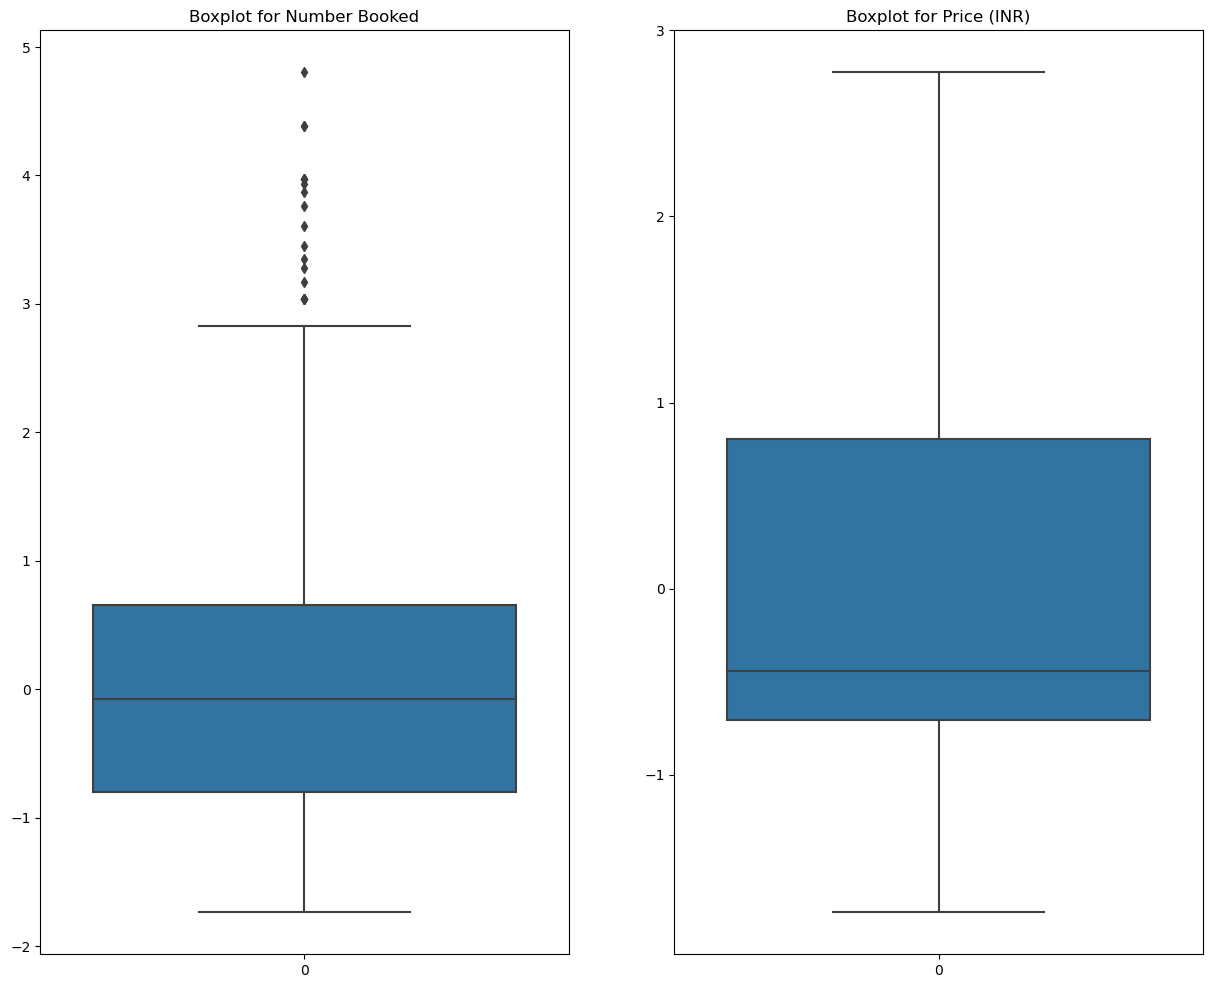

In [11]:
plt.figure(figsize=(15,12))
num_columns = ['Number Booked', 'Price (INR)']
for i, col in enumerate(num_columns, 1):
    plt.subplot(1,2,i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')

In [12]:
Q1 = df['Number Booked'].quantile(0.25)
Q3 = df['Number Booked'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df = df[(df['Number Booked'] > lower_bound) & (df['Number Booked'] < upper_bound)]

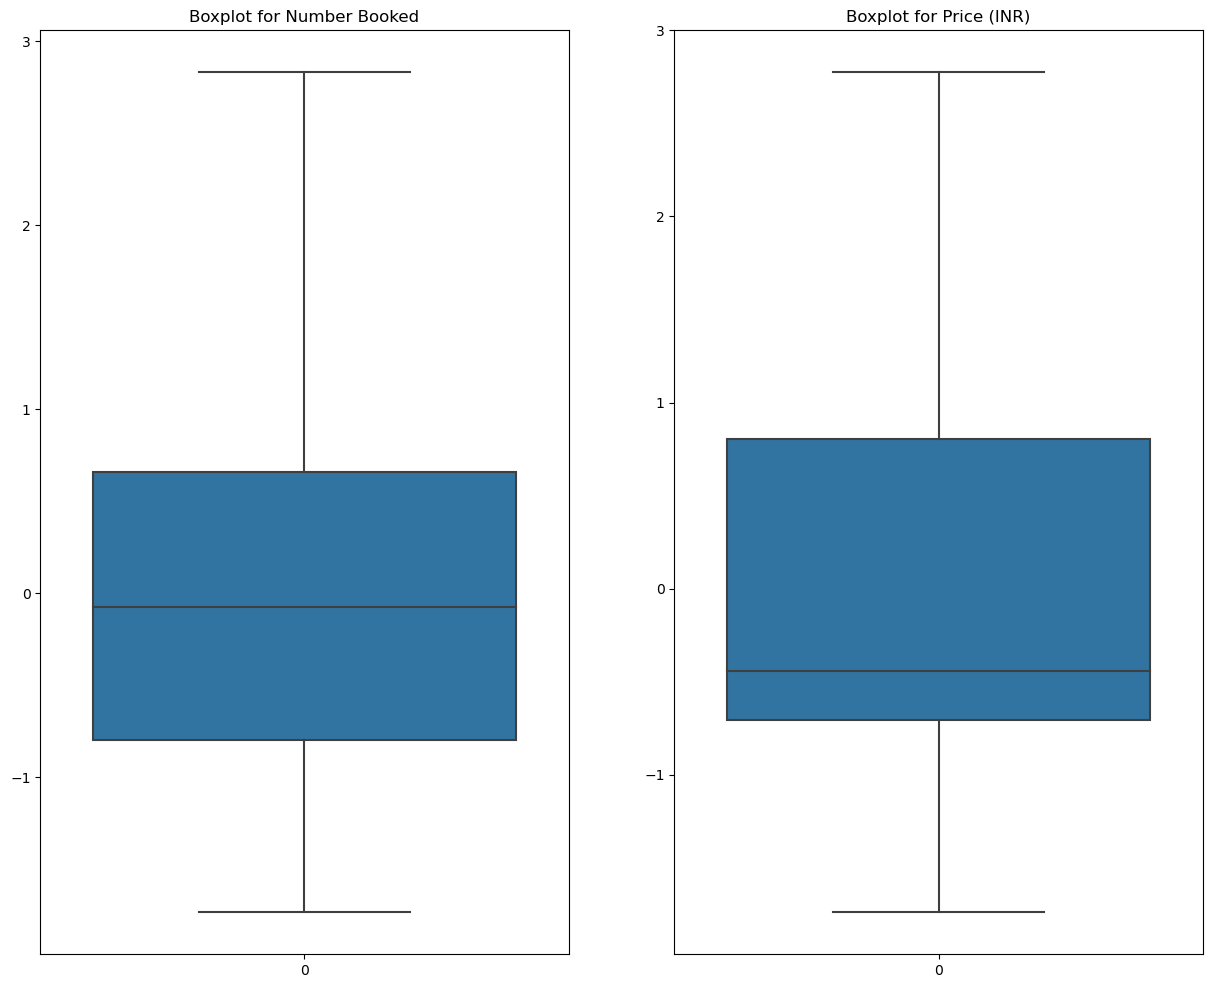

In [13]:
plt.figure(figsize=(15,12))
num_columns = ['Number Booked', 'Price (INR)']
for i, col in enumerate(num_columns, 1):
    plt.subplot(1,2,i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')

In [14]:
df.to_csv('final_df.csv')